In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [3]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
st.set_page_config(page_title="Insurance Fraud Detection", layout="wide")

st.title("🏥 Insurance Fraud Detection")
st.write("Using Machine Learning to predict fraudulent insurance claims.")

2025-07-12 16:21:29.207 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:21:29.216 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:21:29.579 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-12 16:21:29.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:21:29.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:21:29.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:21:29.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [5]:
# Load the dataset
@st.cache_data
def load_data():
    url = "https://raw.githubusercontent.com/mehtabhavin10/insurance_fraud_detection/master/dataset.csv"
    df = pd.read_csv(url)
    return df

2025-07-12 16:22:43.005 No runtime found, using MemoryCacheStorageManager


In [6]:
df = load_data()

2025-07-12 16:22:45.435 No runtime found, using MemoryCacheStorageManager
2025-07-12 16:22:45.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:22:45.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:22:45.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:22:45.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:22:45.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:22:45.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:22:45.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [7]:
# Drop irrelevant or high-cardinality columns
df.drop(['policy_number', 'policy_bind_date', 'incident_date', 'incident_location',
         'auto_make', 'auto_model', 'auto_year'], axis=1, inplace=True)


In [8]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [9]:
# Split into features and target
X = df.drop("fraud_reported", axis=1)
y = df["fraud_reported"]

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Sidebar input
st.sidebar.header("Enter Claim Details")
user_input = {}
for col in X.columns:
    if len(df[col].unique()) < 10:
        user_input[col] = st.sidebar.selectbox(f"{col}", sorted(df[col].unique()))
    else:
        user_input[col] = st.sidebar.slider(f"{col}", float(df[col].min()), float(df[col].max()), float(df[col].mean()))

2025-07-12 16:23:17.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:23:17.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [13]:
# Predict
if st.sidebar.button("Predict Fraud"):
    input_df = pd.DataFrame([user_input])
    prediction = model.predict(input_df)[0]
    if prediction == 1:
        st.error("🚨 This claim is predicted to be **Fraudulent**.")
    else:
        st.success("✅ This claim is predicted to be **Genuine**.")

2025-07-12 16:24:12.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:12.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:12.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:12.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:12.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:12.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-07-12 16:24:16.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:24:16.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

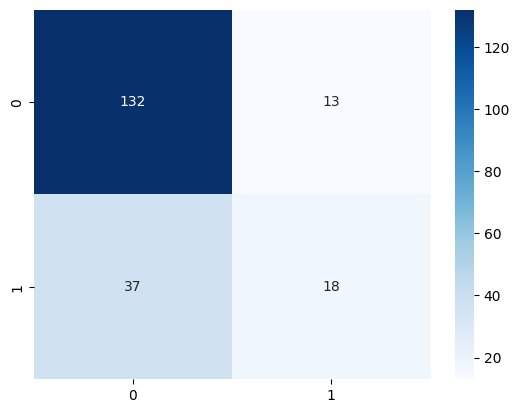

In [14]:
# Evaluation section
st.subheader("📊 Model Evaluation on Test Set")
y_pred = model.predict(X_test)
st.text("Classification Report:")
st.text(classification_report(y_test, y_pred))

st.write("Confusion Matrix:")
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
st.pyplot(fig)